## CV Lab 1

Individually completed by Marcell Nagy 2628829

Include required libraries

In [1]:
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte, img_as_bool, img_as_float
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.exposure import equalize_hist,rescale_intensity
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, cohen_kappa_score

### 3. Reading and displaying images

In [1]:
img_35  = img_as_ubyte(imread('./image-35.jpg'))
img_83  = img_as_ubyte(imread('./image-83.jpg'))
img_110 = img_as_ubyte(imread('./image-110.jpg'))

NameError: name 'img_as_ubyte' is not defined

In [3]:
mask_35  = img_as_ubyte(imread('./mask-35.png'))
mask_83  = img_as_ubyte(imread('./mask-83.png'))
mask_110 = img_as_ubyte(imread('./mask-110.png'))
mask_35_b  = img_as_bool(mask_35)
mask_83_b  = img_as_bool(mask_83)
mask_110_b = img_as_bool(mask_110)

#### View image components

Plot images and components individually. Masks plotted as uint8 images

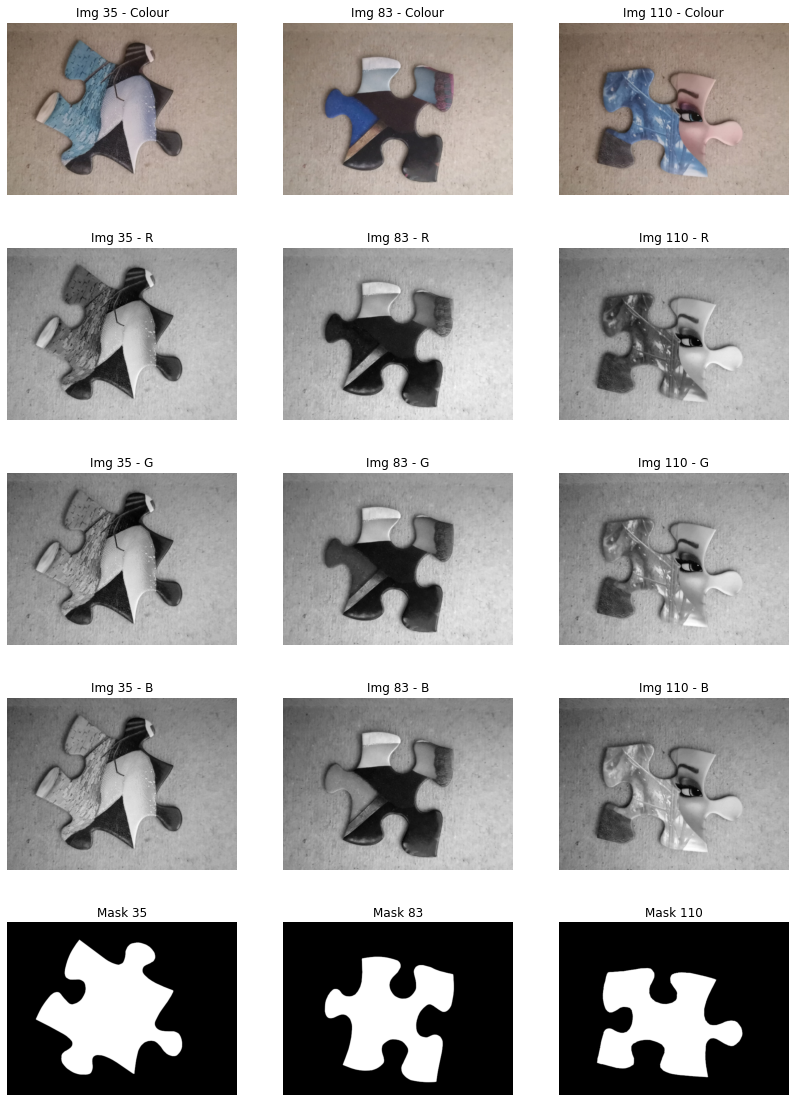

In [4]:
plt.subplots(5,3,figsize=(14,20))
plt.subplot(5,3,1), plt.imshow(img_35) , plt.title("Img 35 - Colour") , plt.axis("off")
plt.subplot(5,3,2), plt.imshow(img_83) , plt.title("Img 83 - Colour") , plt.axis("off")
plt.subplot(5,3,3), plt.imshow(img_110), plt.title("Img 110 - Colour"), plt.axis("off")
plt.subplot(5,3,4), plt.imshow(img_35[:,:,0] , cmap='gray'), plt.title("Img 35 - R") , plt.axis("off")
plt.subplot(5,3,5), plt.imshow(img_83[:,:,0] , cmap='gray'), plt.title("Img 83 - R") , plt.axis("off")
plt.subplot(5,3,6), plt.imshow(img_110[:,:,0], cmap='gray'), plt.title("Img 110 - R"), plt.axis("off")
plt.subplot(5,3,7), plt.imshow(img_35[:,:,1] , cmap='gray'), plt.title("Img 35 - G") , plt.axis("off")
plt.subplot(5,3,8), plt.imshow(img_83[:,:,1] , cmap='gray'), plt.title("Img 83 - G") , plt.axis("off")
plt.subplot(5,3,9), plt.imshow(img_110[:,:,1], cmap='gray'), plt.title("Img 110 - G"), plt.axis("off")
plt.subplot(5,3,10), plt.imshow(img_35[:,:,2] , cmap='gray'), plt.title("Img 35 - B") , plt.axis("off")
plt.subplot(5,3,11), plt.imshow(img_83[:,:,2] , cmap='gray'), plt.title("Img 83 - B") , plt.axis("off")
plt.subplot(5,3,12), plt.imshow(img_110[:,:,2], cmap='gray'), plt.title("Img 110 - B"), plt.axis("off")
plt.subplot(5,3,13), plt.imshow(mask_35) , plt.title("Mask 35") , plt.axis("off")
plt.subplot(5,3,14), plt.imshow(mask_83) , plt.title("Mask 83") , plt.axis("off")
plt.subplot(5,3,15), plt.imshow(mask_110), plt.title("Mask 110"), plt.axis("off")
plt.show()

The colours look correct (Colour image compares well to assignment figure 6)

#### Gray Scale

Convert to grayscale and maintain 8 bit format

In [5]:
img_35_g  = img_as_ubyte(rgb2gray(img_35))
img_83_g  = img_as_ubyte(rgb2gray(img_83))
img_110_g = img_as_ubyte(rgb2gray(img_110))

Plot grayscale images

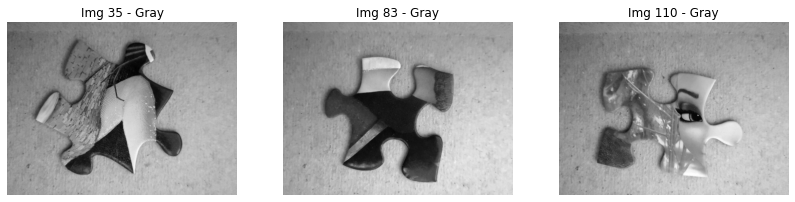

In [6]:
plt.subplots(1,3,figsize=(14,6))
plt.subplot(1,3,1), plt.imshow(img_35_g,cmap='gray') , plt.title("Img 35 - Gray") , plt.axis("off")
plt.subplot(1,3,2), plt.imshow(img_83_g,cmap='gray') , plt.title("Img 83 - Gray") , plt.axis("off")
plt.subplot(1,3,3), plt.imshow(img_110_g,cmap='gray'), plt.title("Img 110 - Gray"), plt.axis("off")
plt.show()

 rgb2gray weighted to represent human perception vs just averaging each channel

#### HSV Color Space

Hue represents colour, Saturation represnts amount of white present, Value represents the intensity

In [7]:
img_35_hsv  = img_as_ubyte(rgb2hsv(img_35))
img_83_hsv  = img_as_ubyte(rgb2hsv(img_83))
img_110_hsv = img_as_ubyte(rgb2hsv(img_110))

Plot hsv components individually

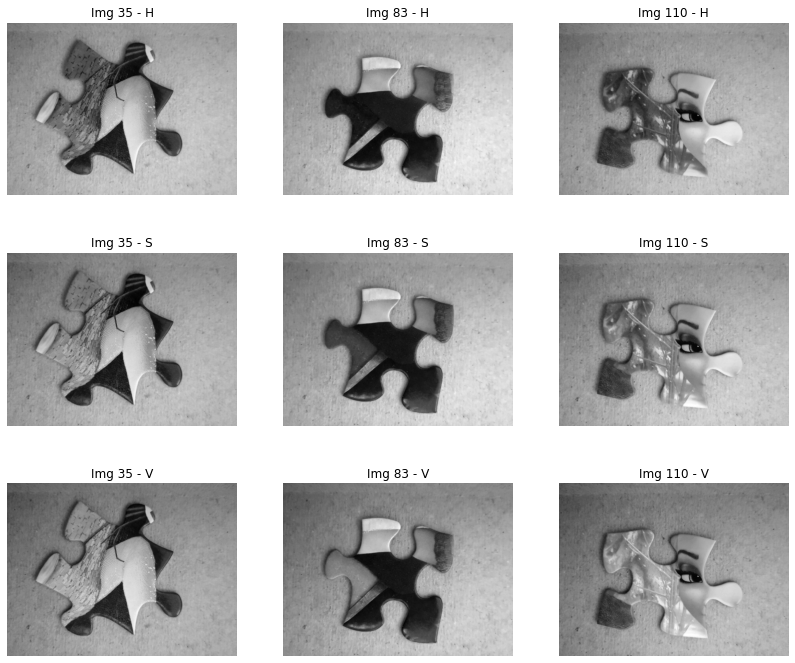

In [8]:
plt.subplots(3,3,figsize=(14,12))
plt.subplot(3,3,1), plt.imshow(img_35[:,:,0] , cmap='gray'), plt.title("Img 35 - H") , plt.axis("off")
plt.subplot(3,3,2), plt.imshow(img_83[:,:,0] , cmap='gray'), plt.title("Img 83 - H") , plt.axis("off")
plt.subplot(3,3,3), plt.imshow(img_110[:,:,0] ,cmap='gray'), plt.title("Img 110 - H"), plt.axis("off")
plt.subplot(3,3,4), plt.imshow(img_35[:,:,1] , cmap='gray'), plt.title("Img 35 - S") , plt.axis("off")
plt.subplot(3,3,5), plt.imshow(img_83[:,:,1] , cmap='gray'), plt.title("Img 83 - S") , plt.axis("off")
plt.subplot(3,3,6), plt.imshow(img_110[:,:,1], cmap='gray'), plt.title("Img 110 - S"), plt.axis("off")
plt.subplot(3,3,7), plt.imshow(img_35[:,:,2] , cmap='gray'), plt.title("Img 35 - V") , plt.axis("off")
plt.subplot(3,3,8), plt.imshow(img_83[:,:,2] , cmap='gray'), plt.title("Img 83 - V") , plt.axis("off")
plt.subplot(3,3,9), plt.imshow(img_110[:,:,2], cmap='gray'), plt.title("Img 110 - V"), plt.axis("off")
plt.show()

### 4. Descriptive Statistics

Using image 35

In [9]:
m,n,k = img_35.shape
print("1. The width = "  + str(n))
print("2. The height = " + str(m))
print("3. Pixel count = "  + str(np.size(img_35[:,:,0])))

1. The width = 600
2. The height = 450
3. Pixel count = 270000


Assume black refers only to 0 intensity only and white to 255 only. The sum is less than 270000 as the image is not completely binary

In [10]:
k_count = (mask_35[:,:,0] == 0).sum()  # This only correct for 3 channel mask images
w_count = ((mask_35[:,:,0] == 255) & (mask_35[:,:,1] == 255) & (mask_35[:,:,2] == 255)).sum() 
print("4. Black mask pixel count = "  + str(k_count))
print("5. White mask pixel count = "  + str(w_count))

4. Black mask pixel count = 194853
5. White mask pixel count = 73196


In [11]:
print("6. Min image pixel value = "  + str(np.min(img_35_g)))
print("7. Max image pixel value = "  + str(np.max(img_35_g)))

6. Min image pixel value = 21
7. Max image pixel value = 229


Use mask to select foreground vs background pixels

In [12]:
pp_min = np.min(img_35_g[mask_35_b[:,:,0]])
pp_max = np.max(img_35_g[mask_35_b[:,:,0]])
print("8a. Min puzzle pixel value = "  + str(pp_min))
print("8b. Max puzzle pixel value = "  + str(pp_max))

8a. Min puzzle pixel value = 21
8b. Max puzzle pixel value = 229


In [13]:
bg_min = np.min(img_35_g[~mask_35_b[:,:,0]])
bg_max = np.max(img_35_g[~mask_35_b[:,:,0]])
print("9a. Min background pixel value = "  + str(bg_min))
print("9b. Max background pixel value = "  + str(bg_max))

9a. Min background pixel value = 38
9b. Max background pixel value = 194


In [14]:
print("10. Mean image pixel value = "  + str('{0:.2f}'.format(np.mean(img_35_g))))

10. Mean image pixel value = 137.21


In [15]:
pp_mean = np.mean(img_35_g[mask_35[:,:,0]])
print("11. Mean puzzle pixel value = "  + str('{0:.2f}'.format(pp_mean)))

11. Mean puzzle pixel value = 135.60


In [16]:
bg_mean = np.mean(img_35_g[~mask_35[:,:,0]])
print("12. Mean background pixel value = "  + str('{0:.2f}'.format(bg_mean)))

12. Mean background pixel value = 147.81


In [17]:
pp_var = np.var(img_35_g[mask_35[:,:,0]])
print("13. Variance puzzle pixel value = "  + str('{0:.2f}'.format(pp_var)))

13. Variance puzzle pixel value = 407.26


In [18]:
bg_var = np.var(img_35_g[~mask_35[:,:,0]])
print("14. Variance background pixel value = "  + str('{0:.2f}'.format(bg_var)))

14. Variance background pixel value = 649.54


#### Using seaborne

Plot RGB channel histograms individually

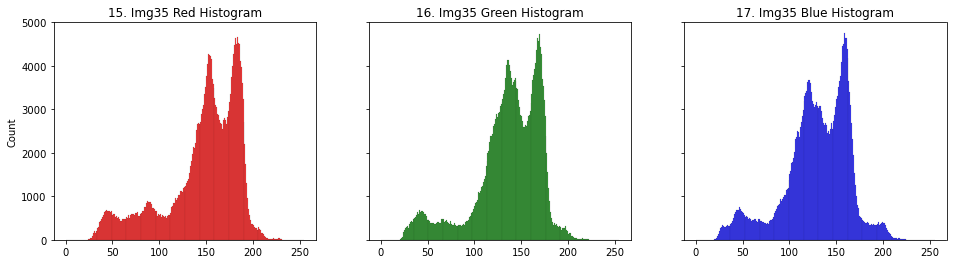

In [19]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), sns.histplot(data=np.ravel(img_35[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('15. Img35 Red Histogram')
plt.subplot(1,3,2), sns.histplot(data=np.ravel(img_35[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('16. Img35 Green Histogram')
plt.subplot(1,3,3), sns.histplot(data=np.ravel(img_35[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('17. Img35 Blue Histogram')
plt.show()

Plot histogram of mask image as uint8. 

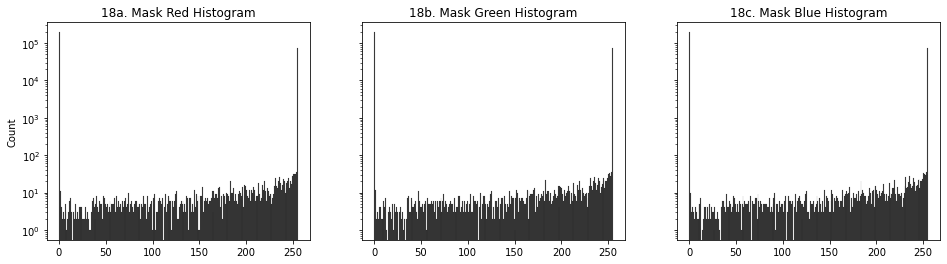

In [20]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1).set_yscale('log'), sns.histplot(data=np.ravel(mask_35[:,:,0]),binwidth=1,binrange=(0,255),color='k'), plt.title('18a. Mask Red Histogram')
plt.subplot(1,3,2).set_yscale('log'), sns.histplot(data=np.ravel(mask_35[:,:,1]),binwidth=1,binrange=(0,255),color='k'), plt.title('18b. Mask Green Histogram')
plt.subplot(1,3,3).set_yscale('log'), sns.histplot(data=np.ravel(mask_35[:,:,2]),binwidth=1,binrange=(0,255),color='k'), plt.title('18c. Mask Blue Histogram')
plt.show()

Log scale reveals that there exists some pixels with intensities that arent 0 or 255

Plot total and gray scale histograms

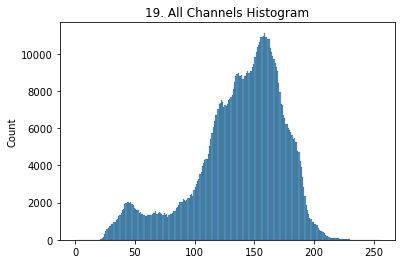

In [21]:
sns.histplot(data=np.ravel(img_35),binwidth=1,binrange=(0,255)), plt.title('19. All Channels Histogram')
plt.show()

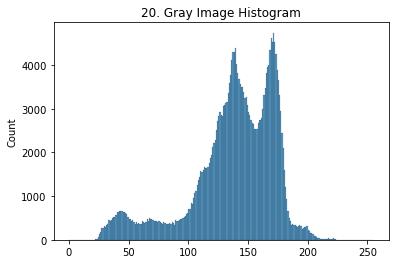

In [22]:
sns.histplot(data=np.ravel(img_35_g[:,:]),binwidth=1,binrange=(0,255)), plt.title('20. Gray Image Histogram')
plt.show()

The difference in shapes is due to the weighting used in the perception model of the rgb2gray function

Plot histogram of HSV image

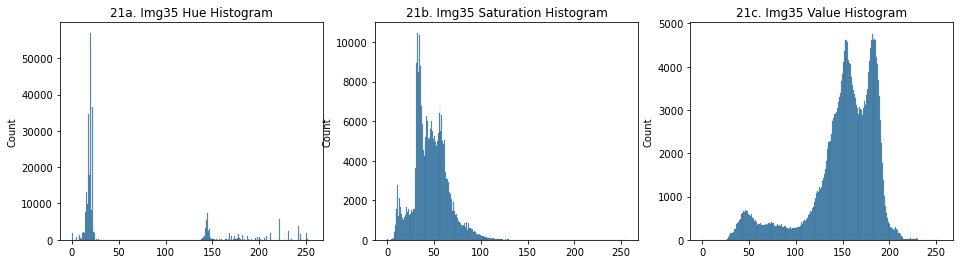

In [23]:
plt.subplots(1,3,figsize=(16,4))
plt.subplot(1,3,1), sns.histplot(data=np.ravel(img_35_hsv[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('21a. Img35 Hue Histogram')
plt.subplot(1,3,2), sns.histplot(data=np.ravel(img_35_hsv[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('21b. Img35 Saturation Histogram')
plt.subplot(1,3,3), sns.histplot(data=np.ravel(img_35_hsv[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('21c. Img35 Value Histogram')
plt.show()

22. Replot histograms with Kernel density estimates

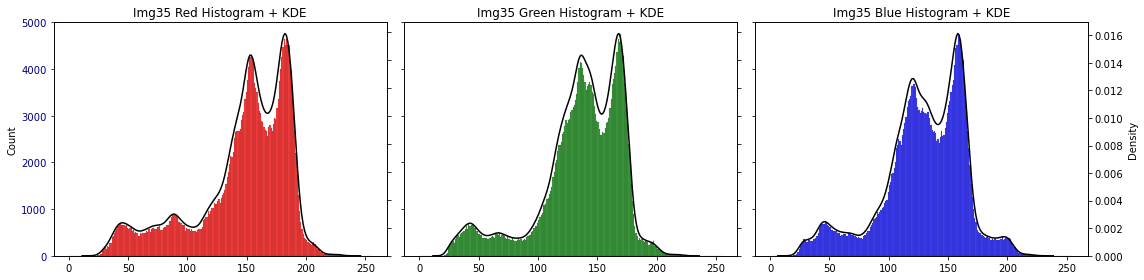

In [24]:
plt.subplots(1,3,figsize=(16,4))

# Plot histogram
plt.subplot(1,3,1), sns.histplot(data=np.ravel(img_35[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('Img35 Red Histogram + KDE'), plt.tick_params(axis='y', colors='navy')
plt.subplot(1,3,2,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(img_35[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('Img35 Green Histogram + KDE'), plt.tick_params(labelleft=False), plt.ylabel(None)
plt.subplot(1,3,3,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(img_35[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('Img35 Blue Histogram + KDE'), plt.tick_params(labelleft=False), plt.ylabel(None)

# Plot KDE
plt.subplot(1,3,1).twinx(), sns.kdeplot(data=np.ravel(img_35[:,:,0]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None)
plt.subplot(1,3,2).twinx(), sns.kdeplot(data=np.ravel(img_35[:,:,1]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None) 
plt.subplot(1,3,3).twinx(), sns.kdeplot(data=np.ravel(img_35[:,:,2]),color='k'), plt.tick_params(axis='y', colors='k')

plt.tight_layout()
plt.show()

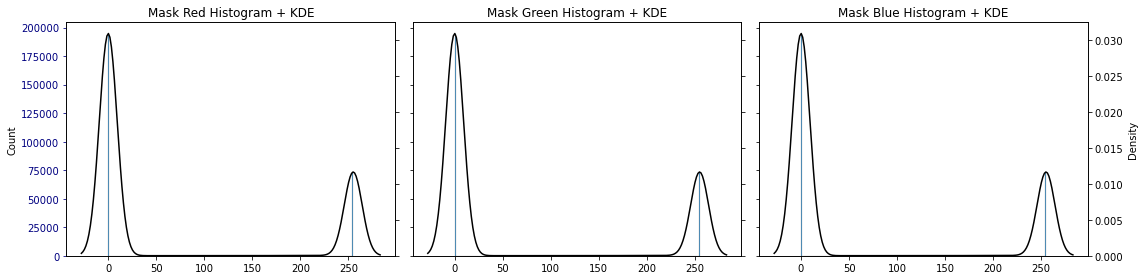

In [25]:
plt.subplots(1,3,figsize=(16,4))

# Plot histogram
plt.subplot(1,3,1), sns.histplot(data=np.ravel(img_as_ubyte(mask_35[:,:,0])),binwidth=1,binrange=(0,255)), plt.title('Mask Red Histogram + KDE'), plt.tick_params(axis='y', colors='navy')
plt.subplot(1,3,2,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(mask_35[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('Mask Green Histogram + KDE'), plt.tick_params(labelleft=False), plt.ylabel(None)
plt.subplot(1,3,3,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(mask_35[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('Mask Blue Histogram + KDE'), plt.tick_params(labelleft=False), plt.ylabel(None)

# Plot KDE
plt.subplot(1,3,1).twinx(), sns.kdeplot(data=np.ravel(mask_35[:,:,0]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None)
plt.subplot(1,3,2).twinx(), sns.kdeplot(data=np.ravel(mask_35[:,:,1]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None) 
plt.subplot(1,3,3).twinx(), sns.kdeplot(data=np.ravel(mask_35[:,:,2]),color='k'), plt.tick_params(axis='y', colors='k')

plt.tight_layout()
plt.show()

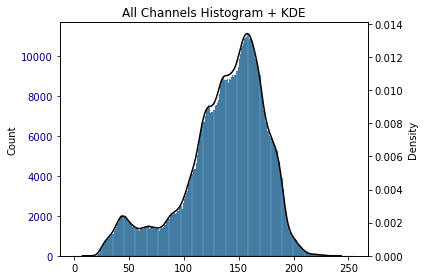

In [26]:
plt.subplots(1,1)

# Plot histogram
plt.subplot(1,1,1), sns.histplot(data=np.ravel(img_35),binwidth=1,binrange=(0,255)), plt.title('All Channels Histogram + KDE'), plt.tick_params(axis='y', colors='navy')

# Plot KDE
plt.subplot(1,1,1).twinx(), sns.kdeplot(data=np.ravel(img_35),color='k'), plt.tick_params(axis='y', colors='k')

plt.tight_layout()
plt.show()

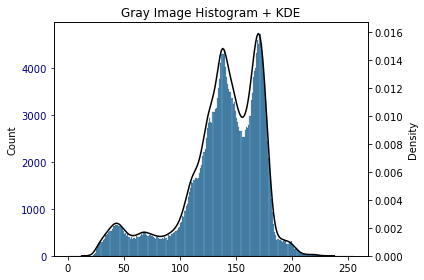

In [27]:
plt.subplots(1,1)

# Plot histogram
plt.subplot(1,1,1), sns.histplot(data=np.ravel(img_35_g),binwidth=1,binrange=(0,255)), plt.title('Gray Image Histogram + KDE'), plt.tick_params(axis='y', colors='navy')

# Plot KDE
plt.subplot(1,1,1).twinx(), sns.kdeplot(data=np.ravel(img_35_g),color='k'), plt.tick_params(axis='y', colors='k')

plt.tight_layout()
plt.show()

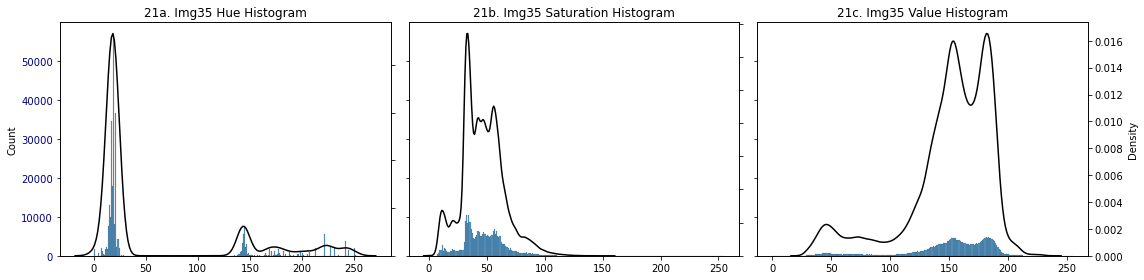

In [28]:
plt.subplots(1,3,figsize=(16,4))

# Plot histogram
plt.subplot(1,3,1), sns.histplot(data=np.ravel(img_35_hsv[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('21a. Img35 Hue Histogram'), plt.tick_params(axis='y', colors='navy')
plt.subplot(1,3,2,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(img_35_hsv[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('21b. Img35 Saturation Histogram'), plt.tick_params(labelleft=False), plt.ylabel(None)
plt.subplot(1,3,3,sharey=plt.subplot(1,3,1)), sns.histplot(data=np.ravel(img_35_hsv[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('21c. Img35 Value Histogram'), plt.tick_params(labelleft=False), plt.ylabel(None)

# Plot KDE
plt.subplot(1,3,1).twinx(), sns.kdeplot(data=np.ravel(img_35_hsv[:,:,0]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None)
plt.subplot(1,3,2).twinx(), sns.kdeplot(data=np.ravel(img_35_hsv[:,:,1]),color='k'), plt.tick_params(labelright=False), plt.ylabel(None) 
plt.subplot(1,3,3).twinx(), sns.kdeplot(data=np.ravel(img_35_hsv[:,:,2]),color='k'), plt.tick_params(axis='y', colors='k')

plt.tight_layout()
plt.show()

### 5. Bonus

#### Contrast stretch

The idea of contrast stretching is for the dynamic range of the intensities to fill the entire 8 bit range to improve the contrast (variation of brightness between details in the image). 

In [29]:
img_35_stretch = rescale_intensity(img_35)
print('New max intensity = '+ str(np.max(img_35_stretch)))
print('New min intensity = '+ str(np.min(img_35_stretch)))

New max intensity = 255
New min intensity = 0


Effect on RGB

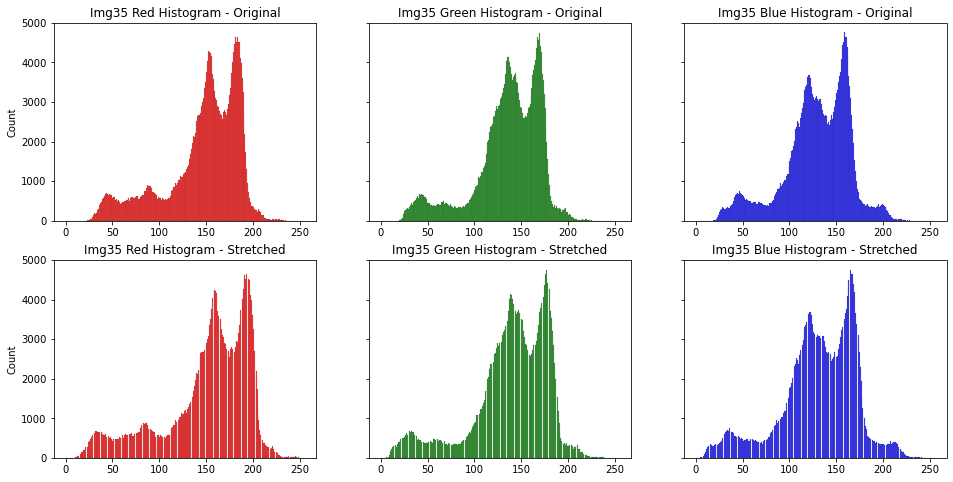

In [30]:
plt.subplots(2,3,figsize=(16,8),sharey=True)
plt.subplot(2,3,1), sns.histplot(data=np.ravel(img_35[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('Img35 Red Histogram - Original')
plt.subplot(2,3,2), sns.histplot(data=np.ravel(img_35[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('Img35 Green Histogram - Original')
plt.subplot(2,3,3), sns.histplot(data=np.ravel(img_35[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('Img35 Blue Histogram - Original')
plt.subplot(2,3,4), sns.histplot(data=np.ravel(img_35_stretch[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('Img35 Red Histogram - Stretched')
plt.subplot(2,3,5), sns.histplot(data=np.ravel(img_35_stretch[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('Img35 Green Histogram - Stretched')
plt.subplot(2,3,6), sns.histplot(data=np.ravel(img_35_stretch[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('Img35 Blue Histogram - Stretched')
plt.show()

Due to the discrete nature, some intensity bins remain empty.

Effect viewed in gray

In [31]:
img_35_g_stretch = img_as_ubyte(rgb2gray(img_35_stretch))

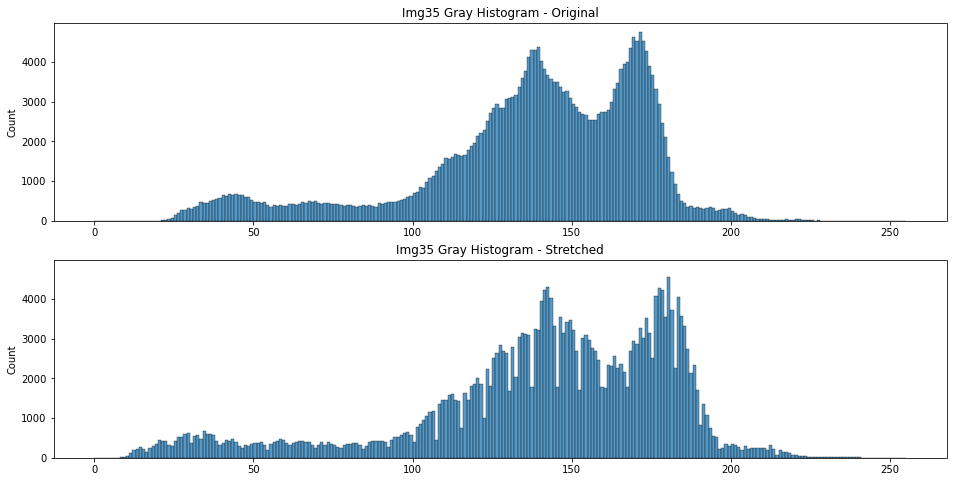

In [32]:
plt.subplots(2,1,figsize=(16,8),sharey=True)
plt.subplot(2,1,1), sns.histplot(data=np.ravel(img_35_g),binwidth=1,binrange=(0,255)), plt.title('Img35 Gray Histogram - Original')
plt.subplot(2,1,2), sns.histplot(data=np.ravel(img_35_g_stretch),binwidth=1,binrange=(0,255)), plt.title('Img35 Gray Histogram - Stretched')
plt.show()

The contrast streching has caused a redistribution of the bins such that the dynamic range of the image is accross the full range of the image scale. Since the channels are combined after contrast stretching, some of the empty bins are filled as the empty bins per channel do not nessacerilty correspond between channel.

Effect viewed in HSV

In [33]:
img_35_hsv_stretch = img_as_ubyte(rgb2hsv(img_35_stretch))

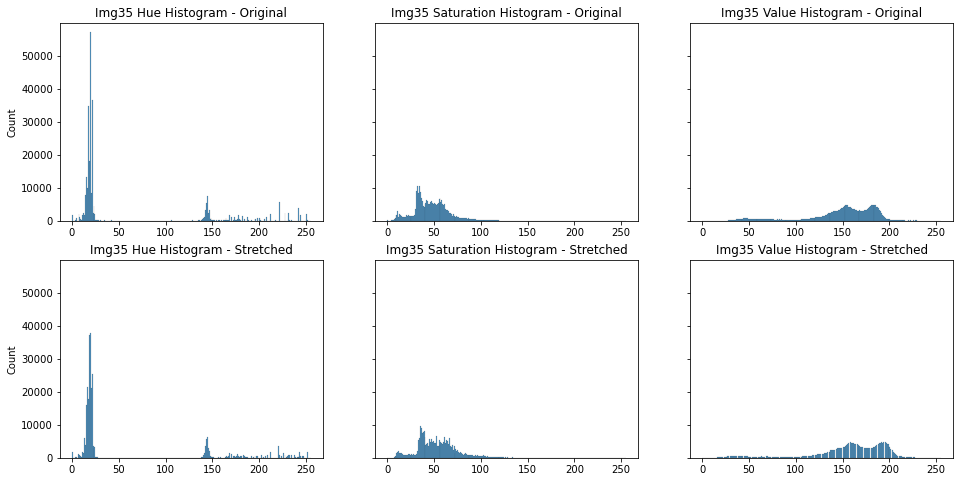

In [34]:
plt.subplots(2,3,figsize=(16,8),sharey=True)
plt.subplot(2,3,1), sns.histplot(data=np.ravel(img_35_hsv[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('Img35 Hue Histogram - Original')
plt.subplot(2,3,2), sns.histplot(data=np.ravel(img_35_hsv[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('Img35 Saturation Histogram - Original')
plt.subplot(2,3,3), sns.histplot(data=np.ravel(img_35_hsv[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('Img35 Value Histogram - Original')
plt.subplot(2,3,4), sns.histplot(data=np.ravel(img_35_hsv_stretch[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('Img35 Hue Histogram - Stretched')
plt.subplot(2,3,5), sns.histplot(data=np.ravel(img_35_hsv_stretch[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('Img35 Saturation Histogram - Stretched')
plt.subplot(2,3,6), sns.histplot(data=np.ravel(img_35_hsv_stretch[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('Img35 Value Histogram - Stretched')
plt.show()

It can be seen that there have been some small redistibution of the Hue and Saturation channels which means a slight distorsion has occured (Change in peaks visible). It can be seen that the intensity channel has been streched out accross the range which has resulted in some empty bins.

Plot images. vmin and max must be set because matplot lib automatically performs contrast stretching when displaying

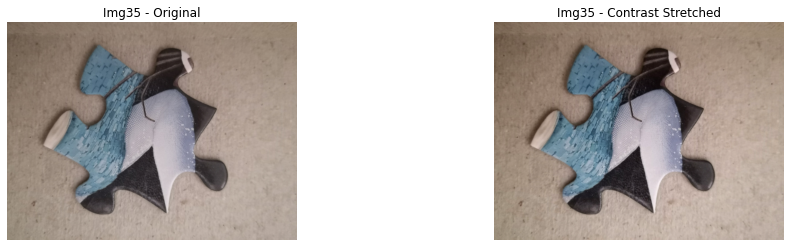

In [35]:
plt.subplots(1,2,figsize=(16,4),sharey=True)
plt.subplot(1,2,1), plt.imshow(img_35, vmin=0, vmax=255), plt.title('Img35 - Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_35_stretch), plt.title('Img35 - Contrast Stretched'), plt.axis('off')
plt.show()

It can be seen that the contrast of the image has improved - the details are slightly less "washed out"

#### Histogram Equailisation

The idea of histogram equalisation is to redistribute intensities to try make the probability of each intensity bin equally likely - In some cases this improves the contast of the image. 

In [36]:
print('Original mean intensity = '+ str(np.mean(img_35)))
print('Original variance = '+ str(np.var(img_35)))

Original mean intensity = 136.83142098765433
Original variance = 1404.3826391412877


RGB histogram equalisation

In [37]:
img_35_equ = img_as_ubyte(np.stack([equalize_hist(img_35[:,:,0]),equalize_hist(img_35[:,:,1]),equalize_hist(img_35[:,:,2])],axis=-1))
print('New mean intensity = '+ str(np.mean(img_35_equ)))
print('New variance = '+ str(np.var(img_35_equ)))

New mean intensity = 128.77307037037036
New variance = 5470.199595535791


By redistributing intensity bins to try make the probability of each bin equally likely, the result is that the mean has dropped closer to the middle of the available intensity range. The variance has increased as the intensities are placed further from the peaks

RGB results

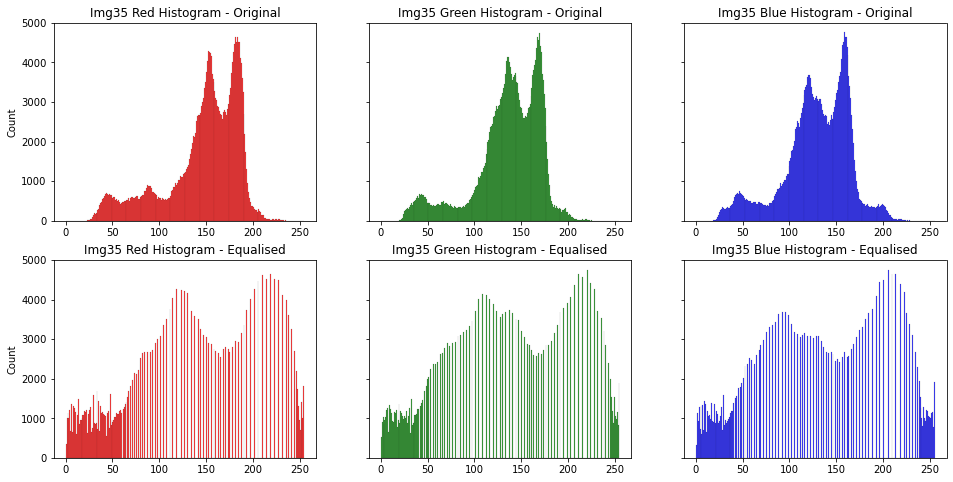

In [38]:
plt.subplots(2,3,figsize=(16,8),sharey=True)
plt.subplot(2,3,1), sns.histplot(data=np.ravel(img_35[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('Img35 Red Histogram - Original')
plt.subplot(2,3,2), sns.histplot(data=np.ravel(img_35[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('Img35 Green Histogram - Original')
plt.subplot(2,3,3), sns.histplot(data=np.ravel(img_35[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('Img35 Blue Histogram - Original')
plt.subplot(2,3,4), sns.histplot(data=np.ravel(img_35_equ[:,:,0]),binwidth=1,binrange=(0,255),color='red'), plt.title('Img35 Red Histogram - Equalised')
plt.subplot(2,3,5), sns.histplot(data=np.ravel(img_35_equ[:,:,1]),binwidth=1,binrange=(0,255),color='green'), plt.title('Img35 Green Histogram - Equalised')
plt.subplot(2,3,6), sns.histplot(data=np.ravel(img_35_equ[:,:,2]),binwidth=1,binrange=(0,255),color='blue'), plt.title('Img35 Blue Histogram - Equalised')
plt.show()

The initial distibution shows that the intiensites are concentrated at a peak near the middle of the range. The results show that the resulting histograms are closer to equally distibuted - Since the pixel intensities themselves are not redistibuted about the bins, an exact flat distibution can only be approximated. Note that further application of the algorithm has no additional effects. 

Effect on gray

In [39]:
img_35_g_equ = img_as_ubyte(rgb2gray(img_35_equ))

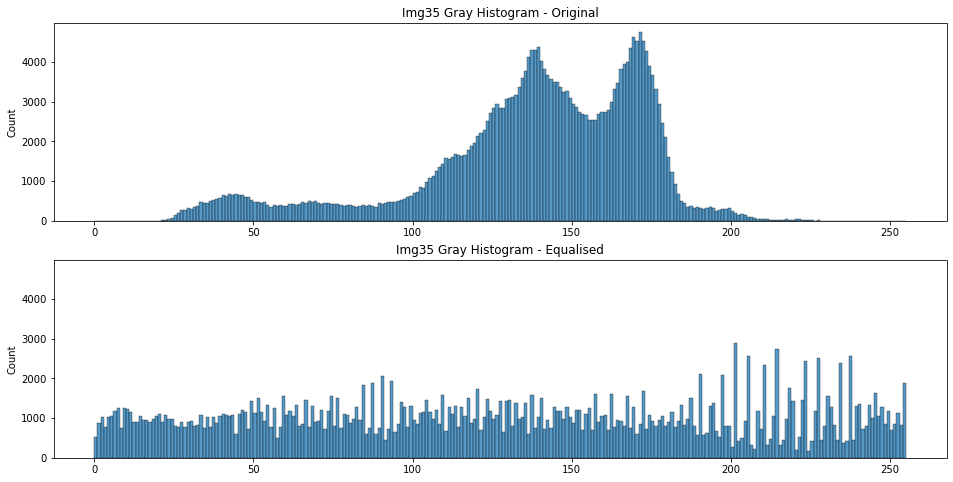

In [40]:
plt.subplots(2,1,figsize=(16,8),sharey=True)
plt.subplot(2,1,1), sns.histplot(data=np.ravel(img_35_g),binwidth=1,binrange=(0,255)), plt.title('Img35 Gray Histogram - Original')
plt.subplot(2,1,2), sns.histplot(data=np.ravel(img_35_g_equ),binwidth=1,binrange=(0,255)), plt.title('Img35 Gray Histogram - Equalised')
plt.show()

HSV Results

In [41]:
img_35_hsv_equ = img_as_ubyte(rgb2hsv(img_35_equ))

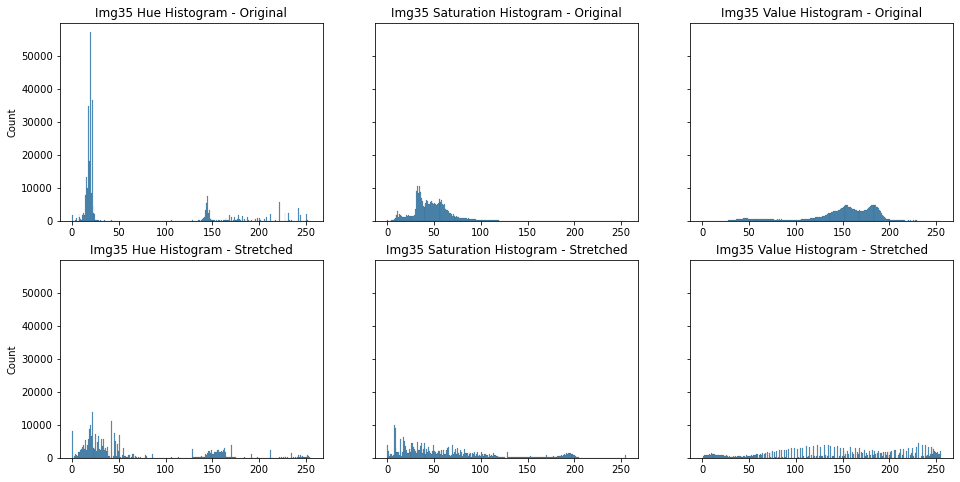

In [42]:
plt.subplots(2,3,figsize=(16,8),sharey=True)
plt.subplot(2,3,1), sns.histplot(data=np.ravel(img_35_hsv[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('Img35 Hue Histogram - Original')
plt.subplot(2,3,2), sns.histplot(data=np.ravel(img_35_hsv[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('Img35 Saturation Histogram - Original')
plt.subplot(2,3,3), sns.histplot(data=np.ravel(img_35_hsv[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('Img35 Value Histogram - Original')
plt.subplot(2,3,4), sns.histplot(data=np.ravel(img_35_hsv_equ[:,:,0]),binwidth=1,binrange=(0,255)), plt.title('Img35 Hue Histogram - Stretched')
plt.subplot(2,3,5), sns.histplot(data=np.ravel(img_35_hsv_equ[:,:,1]),binwidth=1,binrange=(0,255)), plt.title('Img35 Saturation Histogram - Stretched')
plt.subplot(2,3,6), sns.histplot(data=np.ravel(img_35_hsv_equ[:,:,2]),binwidth=1,binrange=(0,255)), plt.title('Img35 Value Histogram - Stretched')
plt.show()

It can be seen that there have been some clear distorsion of the Hue and Saturation channels which means a change in the appearance has occured. It can be seen that in the intensity channel the results show that the resulting histograms are closer to equally distibuted

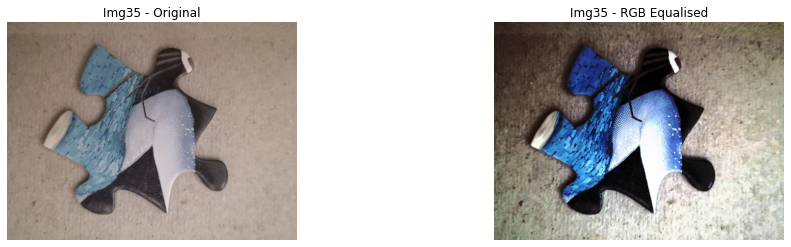

In [43]:
plt.subplots(1,2,figsize=(16,4),sharey=True)
plt.subplot(1,2,1), plt.imshow(img_35), plt.title('Img35 - Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_35_equ), plt.title('Img35 - RGB Equalised'), plt.axis('off')
plt.show()

The results show indeed that darker regions have been made darker and light regions made lighter. The contrast of the puzzle piece has improved however there has been a blue distorsion in the colours which is undesirable. There are more prominant shadows/dark regions introduced in the background.

### 6. Background classifier

In [44]:
img_35_f  = img_as_float(img_35)

#### Q1

In [45]:
def myconvolution(f_img, K):
    """
    Applys a convolution to a 2D image (f_img) using kernal K (assumes square kernal with odd dimensions)
    Zero padding is used
    Returns the convolved image with the initial dimensions
    """        
    # Rotate kernal 180 degrees
    K_conv = np.flip(K)
    
    # Pad image
    m,n   =  K.shape
    t_pad =  m//2
    temp_img = np.pad(f_img,t_pad)
    
    # Perform correlation
    g_img = np.zeros(f_img.shape)
    M,N   = f_img.shape
    
    for i in range(M):
        for j in range(N):
            g_img[i,j] = np.sum(K_conv*temp_img[i:i+m,j:j+n])
    
    return g_img

Test implementation using identity kernal with large padding

In [46]:
m_iden, n_iden = (21,21)
k_iden = np.zeros((m_iden,n_iden))
k_iden[m_iden//2,n_iden//2]=1

C:\Users\marce\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


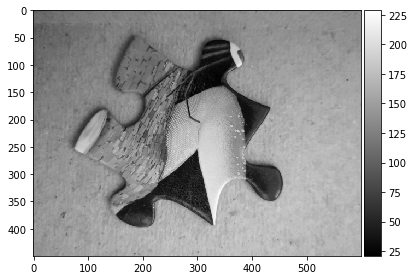

In [47]:
imshow(myconvolution(img_35_g,k_iden),cmap='gray')

No noticable change gives confidence in the implementation

#### Q2

In [48]:
v_prewitt = np.array([[1 , 1, 1],
                      [0 , 0, 0],
                      [-1,-1,-1]])

h_prewitt = np.array([[-1,0,1],
                      [-1,0,1],
                      [-1,0,1]])

k_laplacian = np.array([[-1,-1,-1],
                        [-1, 8,-1],
                        [-1,-1,-1]])

In [49]:
img_35_vpr = np.stack([myconvolution(img_35_f[:,:,0],v_prewitt),myconvolution(img_35_f[:,:,1],v_prewitt),myconvolution(img_35_f[:,:,2],v_prewitt)],axis=-1)
img_35_hpr = np.stack([myconvolution(img_35_f[:,:,0],h_prewitt),myconvolution(img_35_f[:,:,1],h_prewitt),myconvolution(img_35_f[:,:,2],h_prewitt)],axis=-1)
img_35_lap = np.stack([myconvolution(img_35_f[:,:,0],k_laplacian),myconvolution(img_35_f[:,:,1],k_laplacian),myconvolution(img_35_f[:,:,2],k_laplacian)],axis=-1)

Plot rescaled results (0,1) to avoid clipping

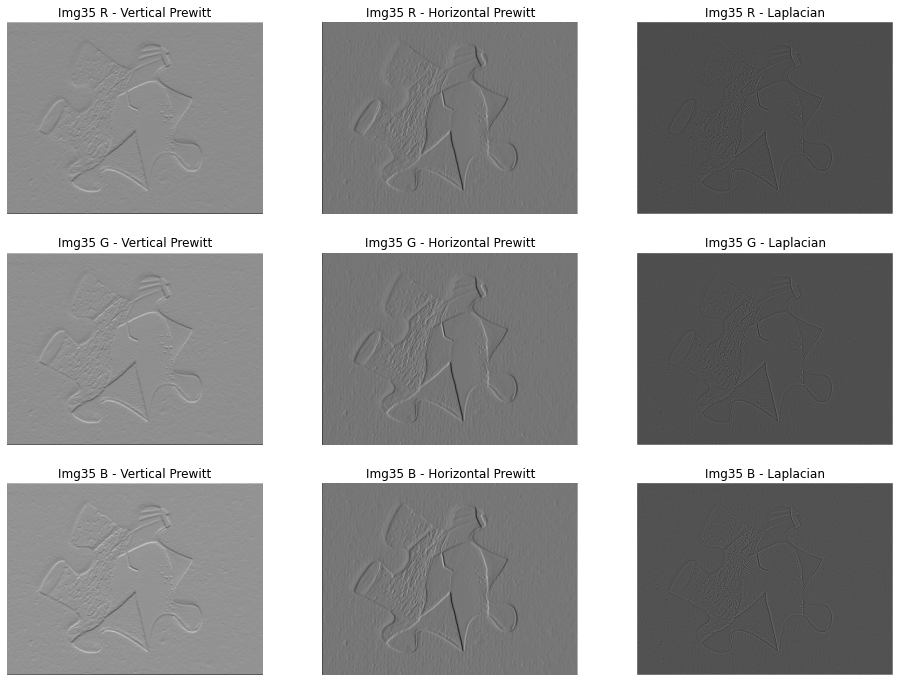

In [50]:
plt.subplots(3,3,figsize=(16,12),sharey=True)
plt.subplot(3,3,1), plt.imshow(rescale_intensity(img_35_vpr[:,:,0],out_range=(0,1)),cmap='gray'), plt.title('Img35 R - Vertical Prewitt') , plt.axis('off')
plt.subplot(3,3,2), plt.imshow(rescale_intensity(img_35_hpr[:,:,0],out_range=(0,1)),cmap='gray'), plt.title('Img35 R - Horizontal Prewitt') , plt.axis('off')
plt.subplot(3,3,3), plt.imshow(rescale_intensity(img_35_lap[:,:,0],out_range=(0,1)),cmap='gray'), plt.title('Img35 R - Laplacian') , plt.axis('off')
plt.subplot(3,3,4), plt.imshow(rescale_intensity(img_35_vpr[:,:,1],out_range=(0,1)),cmap='gray'), plt.title('Img35 G - Vertical Prewitt') , plt.axis('off')
plt.subplot(3,3,5), plt.imshow(rescale_intensity(img_35_hpr[:,:,1],out_range=(0,1)),cmap='gray'), plt.title('Img35 G - Horizontal Prewitt') , plt.axis('off')
plt.subplot(3,3,6), plt.imshow(rescale_intensity(img_35_lap[:,:,1],out_range=(0,1)),cmap='gray'), plt.title('Img35 G - Laplacian') , plt.axis('off')
plt.subplot(3,3,7), plt.imshow(rescale_intensity(img_35_vpr[:,:,2],out_range=(0,1)),cmap='gray'), plt.title('Img35 B - Vertical Prewitt') , plt.axis('off')
plt.subplot(3,3,8), plt.imshow(rescale_intensity(img_35_hpr[:,:,2],out_range=(0,1)),cmap='gray'), plt.title('Img35 B - Horizontal Prewitt') , plt.axis('off')
plt.subplot(3,3,9), plt.imshow(rescale_intensity(img_35_lap[:,:,2],out_range=(0,1)),cmap='gray'), plt.title('Img35 B - Laplacian') , plt.axis('off')
plt.show()

#### Q3 Training

Determine statistical parameters of entire image

In [51]:
feature_data = np.stack([img_35_vpr[:,:,0].flatten(),img_35_vpr[:,:,1].flatten(),img_35_vpr[:,:,2].flatten(),
                         img_35_hpr[:,:,0].flatten(),img_35_hpr[:,:,1].flatten(),img_35_hpr[:,:,2].flatten(),
                         img_35_lap[:,:,0].flatten(),img_35_lap[:,:,1].flatten(),img_35_lap[:,:,2].flatten(),
                         img_35[:,:,0].flatten()    ,img_35[:,:,1].flatten()    ,img_35[:,:,2].flatten(),
                         img_35_hsv[:,:,0].flatten(),img_35_hsv[:,:,1].flatten(),img_35_hsv[:,:,2].flatten()],axis=-1)

In [52]:
feature_data.shape

(270000, 15)

In [53]:
feature_mean = np.mean(feature_data,axis=0)

In [54]:
print(feature_mean)

[ 8.40958606e-04  9.45519245e-04  1.04964415e-03 -6.59114016e-04
 -6.78286129e-04 -7.33478577e-04  1.43069426e-02  1.29013943e-02
  1.16251126e-02  1.46035300e+02  1.35566778e+02  1.28892185e+02
  5.63972704e+01  4.62937037e+01  1.50522407e+02]


In [55]:
feature_cov = np.cov(feature_data,rowvar=False)

In [56]:
feature_cov.shape

(15, 15)

In [57]:
print(feature_cov)

[[ 2.44956063e-02  2.27256640e-02  2.12973347e-02 -1.03861734e-03
  -1.12089979e-03 -1.17736882e-03 -3.17108890e-03 -3.17605936e-03
  -3.22709783e-03 -1.22810097e-01 -1.06759065e-01 -8.34597648e-02
   1.39678078e-01  6.49836329e-02 -8.68793252e-02]
 [ 2.27256640e-02  2.14644932e-02  2.02831840e-02 -1.12090042e-03
  -1.23758695e-03 -1.29068108e-03 -3.24622250e-03 -3.21292211e-03
  -3.22741889e-03 -1.45327103e-01 -1.28181472e-01 -1.07230352e-01
   1.08083205e-01  6.80989186e-02 -1.11876321e-01]
 [ 2.12973347e-02  2.02831840e-02  1.94178954e-02 -1.17733152e-03
  -1.29065865e-03 -1.33433449e-03 -3.33271072e-03 -3.26390172e-03
  -3.24635770e-03 -1.78219296e-01 -1.56937544e-01 -1.35291430e-01
   9.85804677e-02  7.58683801e-02 -1.42738660e-01]
 [-1.03861734e-03 -1.12090042e-03 -1.17733152e-03  2.39507041e-02
   2.25853629e-02  2.15512007e-02  2.34371743e-03  2.22587303e-03
   2.22679348e-03  9.62542696e-02  9.34170108e-02  9.53094360e-02
  -1.40027561e-01 -1.34409899e-02  1.01114795e-01]
 [-1

#### Q4 Inference

Obtain same features

In [58]:
img_83_f = img_as_float(img_83)

In [59]:
img_83_vpr = np.stack([myconvolution(img_83_f[:,:,0],v_prewitt),myconvolution(img_83_f[:,:,1],v_prewitt),myconvolution(img_83_f[:,:,2],v_prewitt)],axis=-1)
img_83_hpr = np.stack([myconvolution(img_83_f[:,:,0],h_prewitt),myconvolution(img_83_f[:,:,1],h_prewitt),myconvolution(img_83_f[:,:,2],h_prewitt)],axis=-1)
img_83_lap = np.stack([myconvolution(img_83_f[:,:,0],k_laplacian),myconvolution(img_83_f[:,:,1],k_laplacian),myconvolution(img_83_f[:,:,2],k_laplacian)],axis=-1)

In [60]:
img_83_hsv = img_as_ubyte(rgb2hsv(img_83))

"find the value of the probability density function of the new
data points being background pixels"

In [61]:
validation_data = np.stack([img_83_vpr[:,:,0].flatten(),img_83_vpr[:,:,1].flatten(),img_83_vpr[:,:,2].flatten(),
                         img_83_hpr[:,:,0].flatten(),img_83_hpr[:,:,1].flatten(),img_83_hpr[:,:,2].flatten(),
                         img_83_lap[:,:,0].flatten(),img_83_lap[:,:,1].flatten(),img_83_lap[:,:,2].flatten(),
                         img_83[:,:,0].flatten(),img_83[:,:,1].flatten(),img_83[:,:,2].flatten(),
                         img_83_hsv[:,:,0].flatten(),img_83_hsv[:,:,1].flatten(),img_83_hsv[:,:,2].flatten()],axis=-1)

In [62]:
train_model = multivariate_normal(mean=feature_mean,cov=feature_cov)
validation_results = train_model.pdf(validation_data)

"If the PDF value of a data point coming from the background of the image is above some threshold (Θ) classify it as being background"

In [63]:
thres = np.geomspace(1e-20,np.max(validation_results),num = 50)
accuracy = []

for thres_i in thres:
    predict_bg = validation_results > thres_i
    num_incorrect = np.sum(predict_bg ^ np.ravel(~mask_83_b[:,:,0])) # Using equivalent bitwise operation to find miss predict
    accuracy.append(1-num_incorrect/(np.size(validation_results)))

In [64]:
thres_opti = thres[accuracy.index(max(accuracy))]
print('The best accuracy was: ' + str(max(accuracy)))
print('The threshold was: ' + str(thres_opti))

The best accuracy was: 0.909962962962963
The threshold was: 0.000247562970557274


Check for maxima by plotting the trend

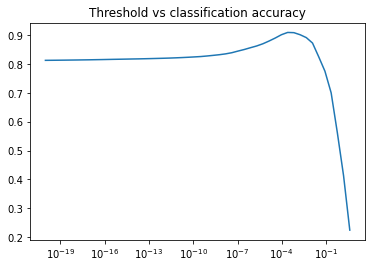

In [65]:
plt.figure()
plt.title('Threshold vs classification accuracy')
plt.semilogx(thres,accuracy)
plt.show()

Visualise results

In [66]:
validation_pdm = rescale_intensity(img_as_float(np.reshape(validation_results,(m,n))))

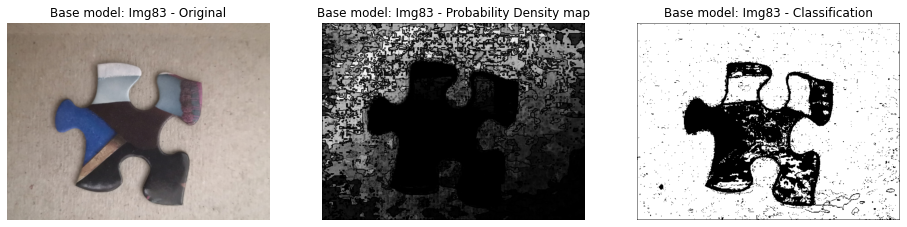

In [67]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_83), plt.title('Base model: Img83 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(validation_pdm,cmap='gray'), plt.title('Base model: Img83 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(validation_results>thres_opti,(m,n))),cmap='gray'), plt.title('Base model: Img83 - Classification') , plt.axis('off')
plt.show()

Its clear that the classifier has been mildly successful at identifitying background pixels, however with many foreground pixels have been classified as background, there is much room for improvement

#### Q5

###### Apply prewitt and laplacian to HSV images

In [68]:
img_35_hsv_f = img_as_float(rgb2hsv(img_35))
img_83_hsv_f = img_as_float(rgb2hsv(img_83))

In [69]:
img_35_hsv_vpr = np.stack([myconvolution(img_35_hsv_f[:,:,0],v_prewitt),myconvolution(img_35_hsv_f[:,:,1],v_prewitt),myconvolution(img_35_hsv_f[:,:,2],v_prewitt)],axis=-1)
img_35_hsv_hpr = np.stack([myconvolution(img_35_hsv_f[:,:,0],h_prewitt),myconvolution(img_35_hsv_f[:,:,1],h_prewitt),myconvolution(img_35_hsv_f[:,:,2],h_prewitt)],axis=-1)
img_35_hsv_lap = np.stack([myconvolution(img_35_hsv_f[:,:,0],k_laplacian),myconvolution(img_35_hsv_f[:,:,1],k_laplacian),myconvolution(img_35_hsv_f[:,:,2],k_laplacian)],axis=-1)

In [70]:
img_83_hsv_vpr = np.stack([myconvolution(img_83_hsv_f[:,:,0],v_prewitt),myconvolution(img_83_hsv_f[:,:,1],v_prewitt),myconvolution(img_83_hsv_f[:,:,2],v_prewitt)],axis=-1)
img_83_hsv_hpr = np.stack([myconvolution(img_83_hsv_f[:,:,0],h_prewitt),myconvolution(img_83_hsv_f[:,:,1],h_prewitt),myconvolution(img_83_hsv_f[:,:,2],h_prewitt)],axis=-1)
img_83_hsv_lap = np.stack([myconvolution(img_83_hsv_f[:,:,0],k_laplacian),myconvolution(img_83_hsv_f[:,:,1],k_laplacian),myconvolution(img_83_hsv_f[:,:,2],k_laplacian)],axis=-1)

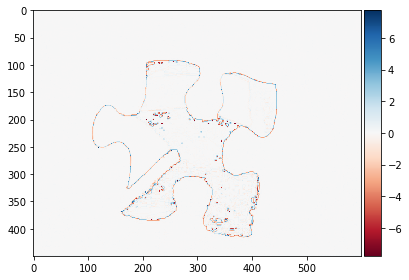

In [71]:
imshow(img_83_hsv_lap[:,:,0])

There is a strong edge formed in the hue channel due to the difference in colour of the puzzle over the background

Rebuild data

In [72]:
alt_feature_data = np.stack([img_35_hsv_vpr[:,:,0].flatten(),img_35_hsv_vpr[:,:,1].flatten(),img_35_hsv_vpr[:,:,2].flatten(),
                         img_35_hsv_hpr[:,:,0].flatten(),img_35_hsv_hpr[:,:,1].flatten(),img_35_hsv_hpr[:,:,2].flatten(),
                         img_35_hsv_lap[:,:,0].flatten(),img_35_hsv_lap[:,:,1].flatten(),img_35_hsv_lap[:,:,2].flatten(),
                         img_35[:,:,0].flatten()    ,img_35[:,:,1].flatten()    ,img_35[:,:,2].flatten(),
                         img_35_hsv[:,:,0].flatten(),img_35_hsv[:,:,1].flatten(),img_35_hsv[:,:,2].flatten()],axis=-1)

In [73]:
alt_validation_data = np.stack([img_83_hsv_vpr[:,:,0].flatten(),img_83_hsv_vpr[:,:,1].flatten(),img_83_hsv_vpr[:,:,2].flatten(),
                         img_83_hsv_hpr[:,:,0].flatten(),img_83_hsv_hpr[:,:,1].flatten(),img_83_hsv_hpr[:,:,2].flatten(),
                         img_83_hsv_lap[:,:,0].flatten(),img_83_hsv_lap[:,:,1].flatten(),img_83_hsv_lap[:,:,2].flatten(),
                         img_83[:,:,0].flatten(),img_83[:,:,1].flatten(),img_83[:,:,2].flatten(),
                         img_83_hsv[:,:,0].flatten(),img_83_hsv[:,:,1].flatten(),img_83_hsv[:,:,2].flatten()],axis=-1)

Retrain

In [74]:
alt_mean = np.mean(alt_feature_data,axis=0)
alt_cov  = np.cov(alt_feature_data,rowvar=False)

In [75]:
alt_model   = multivariate_normal(mean=alt_mean,cov=alt_cov)
alt_results = alt_model.pdf(alt_validation_data)

"If the PDF value of a data point coming from the background of the image is above some threshold (Θ) classify it as being background"

In [76]:
alt_thres = np.geomspace(1e-20,np.max(alt_results),num = 100)
alt_accuracy = []

for alt_thres_i in alt_thres:
    alt_predict_bg = alt_results > alt_thres_i
    alt_num_incorrect = np.sum(alt_predict_bg ^ np.ravel(~mask_83_b[:,:,0]))
    alt_accuracy.append(1-alt_num_incorrect/(np.size(alt_results)))

In [77]:
alt_thres_opti = alt_thres[alt_accuracy.index(max(alt_accuracy))]
print('The best accuracy was: ' + str(max(alt_accuracy)))
print('The threshold was: ' + str(alt_thres_opti))

The best accuracy was: 0.9414
The threshold was: 2.31384992109634e-08


Optimise by plotting the trend

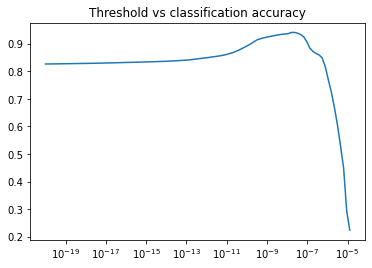

In [78]:
plt.figure()
plt.title('Threshold vs classification accuracy')
plt.semilogx(alt_thres,alt_accuracy)
plt.show()

Visualise results

In [79]:
alt_pdm = rescale_intensity(img_as_float(np.reshape(alt_results,(m,n))))

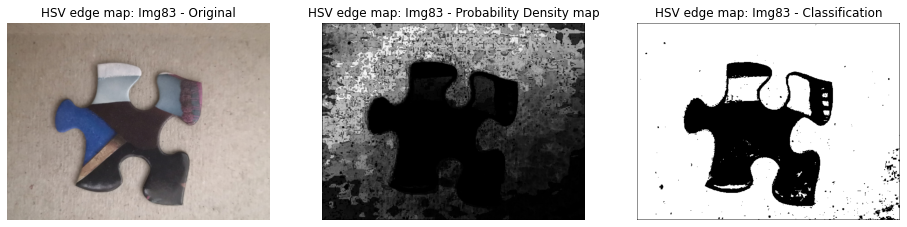

In [80]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_83), plt.title('HSV edge map: Img83 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(alt_pdm,cmap='gray'), plt.title('HSV edge map: Img83 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(alt_results>alt_thres_opti,(m,n))),cmap='gray'), plt.title('HSV edge map: Img83 - Classification') , plt.axis('off')
plt.show()

Using the HSV channels for the edge detectors has resulted in an improved result. However more of the background seems to be miss classified

###### Remove RGB channels

Rebuild data

In [81]:
final_feature_data = np.stack([img_35_hsv_vpr[:,:,0].flatten(),img_35_hsv_vpr[:,:,1].flatten(),img_35_hsv_vpr[:,:,2].flatten(),
                         img_35_hsv_hpr[:,:,0].flatten(),img_35_hsv_hpr[:,:,1].flatten(),img_35_hsv_hpr[:,:,2].flatten(),
                         img_35_hsv_lap[:,:,0].flatten(),img_35_hsv_lap[:,:,1].flatten(),img_35_hsv_lap[:,:,2].flatten(),
                         img_35_hsv[:,:,0].flatten(),img_35_hsv[:,:,1].flatten(),img_35_hsv[:,:,2].flatten()],axis=-1)

In [82]:
final_validation_data = np.stack([img_83_hsv_vpr[:,:,0].flatten(),img_83_hsv_vpr[:,:,1].flatten(),img_83_hsv_vpr[:,:,2].flatten(),
                         img_83_hsv_hpr[:,:,0].flatten(),img_83_hsv_hpr[:,:,1].flatten(),img_83_hsv_hpr[:,:,2].flatten(),
                         img_83_hsv_lap[:,:,0].flatten(),img_83_hsv_lap[:,:,1].flatten(),img_83_hsv_lap[:,:,2].flatten(),
                         img_83_hsv[:,:,0].flatten(),img_83_hsv[:,:,1].flatten(),img_83_hsv[:,:,2].flatten()],axis=-1)

Retrain

In [83]:
final_mean = np.mean(final_feature_data,axis=0)
final_cov  = np.cov(final_feature_data,rowvar=False)

In [84]:
final_model   = multivariate_normal(mean=final_mean,cov=final_cov)
final_results = final_model.pdf(final_validation_data)

"If the PDF value of a data point coming from the background of the image is above some threshold (Θ) classify it as being background"

In [85]:
final_thres = np.geomspace(1e-10,np.max(final_results),num = 100)
final_accuracy = []

for final_thres_i in final_thres:
    final_predict_bg = final_results > final_thres_i
    final_num_incorrect = np.sum(final_predict_bg ^ np.ravel(~mask_83_b[:,:,0]))
    final_accuracy.append(1-final_num_incorrect/(np.size(final_results)))

In [86]:
final_thres_opti = final_thres[final_accuracy.index(max(final_accuracy))]
print('The best accuracy was: ' + str(max(final_accuracy)))
print('The threshold was: ' + str(final_thres_opti))

The best accuracy was: 0.9413370370370371
The threshold was: 0.00015263755321427944


Optimise by plotting the trend

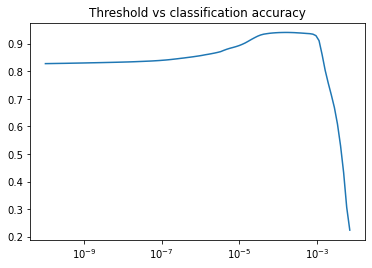

In [87]:
plt.figure()
plt.title('Threshold vs classification accuracy')
plt.semilogx(final_thres,final_accuracy)
plt.show()

Visualise results

In [88]:
final_pdm = rescale_intensity(img_as_float(np.reshape(final_results,(m,n))))

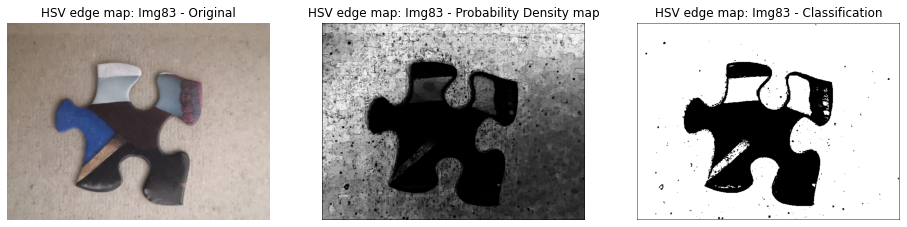

In [89]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_83), plt.title('HSV edge map: Img83 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(final_pdm,cmap='gray'), plt.title('HSV edge map: Img83 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(final_results>final_thres_opti,(m,n))),cmap='gray'), plt.title('HSV edge map: Img83 - Classification') , plt.axis('off')
plt.show()

For this image - The inclusion of RGB channels does not provide an obvious improvement to the classifier in terms of accuracy. However the miss classified region has changed since in this result its clear that the background regions are better classified however the region within the puzzle piece has performed worse. For general puzzle images the inclusion of RGB channels may perform better or worse, more data is required to be sure. 

#### Q6 Testing

##### Using best model

The model using edge detectors applied to the HSV image performed best as measured by accuracy 

In [90]:
img_110_hsv_f = img_as_float(rgb2hsv(img_110))

In [91]:
img_110_hsv_vpr = np.stack([myconvolution(img_110_hsv_f[:,:,0],v_prewitt),myconvolution(img_110_hsv_f[:,:,1],v_prewitt),myconvolution(img_110_hsv_f[:,:,2],v_prewitt)],axis=-1)
img_110_hsv_hpr = np.stack([myconvolution(img_110_hsv_f[:,:,0],h_prewitt),myconvolution(img_110_hsv_f[:,:,1],h_prewitt),myconvolution(img_110_hsv_f[:,:,2],h_prewitt)],axis=-1)
img_110_hsv_lap = np.stack([myconvolution(img_110_hsv_f[:,:,0],k_laplacian),myconvolution(img_110_hsv_f[:,:,1],k_laplacian),myconvolution(img_110_hsv_f[:,:,2],k_laplacian)],axis=-1)

In [92]:
test_data = np.stack([img_110_hsv_vpr[:,:,0].flatten(),img_110_hsv_vpr[:,:,1].flatten(),img_110_hsv_vpr[:,:,2].flatten(),
                     img_110_hsv_hpr[:,:,0].flatten(),img_110_hsv_hpr[:,:,1].flatten(),img_110_hsv_hpr[:,:,2].flatten(),
                     img_110_hsv_lap[:,:,0].flatten(),img_110_hsv_lap[:,:,1].flatten(),img_110_hsv_lap[:,:,2].flatten(),
                     img_110[:,:,0].flatten(),img_110[:,:,1].flatten(),img_110[:,:,2].flatten(),
                     img_110_hsv[:,:,0].flatten(),img_110_hsv[:,:,1].flatten(),img_110_hsv[:,:,2].flatten()],axis=-1)

In [93]:
test_results = alt_model.pdf(test_data)

In [94]:
test_thres = alt_thres_opti
test_predict_bg = test_results > test_thres
test_num_incorrect = np.sum(test_predict_bg ^ np.ravel(~mask_110_b[:,:,0]))
test_accuracy = 1-test_num_incorrect/(np.size(test_results))

In [95]:
print('The best accuracy was: ' + str(test_accuracy))

The best accuracy was: 0.9668925925925926


The test performs better than the validation and training set, however this can be understood as the example seemingly being an easier example to classify for the model. More examples should be used to get a better idea of the performance

In [96]:
test_pdm = rescale_intensity(img_as_float(np.reshape(test_results,(m,n))))

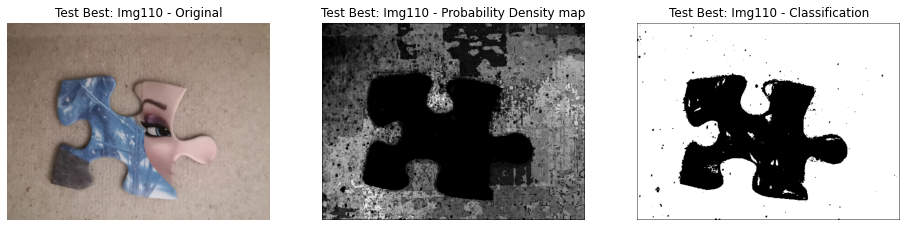

In [97]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_110), plt.title('Test Best: Img110 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(test_pdm,cmap='gray'), plt.title('Test Best: Img110 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(test_results>test_thres,(m,n))),cmap='gray'), plt.title('Test Best: Img110 - Classification') , plt.axis('off')
plt.show()

###### Possible improvement

Improvement idea: Learn mean and covariances of the background pixels instead of the entire image

In [98]:
improve_data = np.stack([img_35_hsv_vpr[~mask_35_b[:,:,0],0].flatten(),img_35_hsv_vpr[~mask_35_b[:,:,0],1].flatten(),img_35_hsv_vpr[~mask_35_b[:,:,0],2].flatten(),
                         img_35_hsv_hpr[~mask_35_b[:,:,0],0].flatten(),img_35_hsv_hpr[~mask_35_b[:,:,0],1].flatten(),img_35_hsv_hpr[~mask_35_b[:,:,0],2].flatten(),
                         img_35_hsv_lap[~mask_35_b[:,:,0],0].flatten(),img_35_hsv_lap[~mask_35_b[:,:,0],1].flatten(),img_35_hsv_lap[~mask_35_b[:,:,0],2].flatten(),
                         img_35[~mask_35_b[:,:,0],0].flatten()    ,img_35[~mask_35_b[:,:,0],1].flatten()    ,img_35[~mask_35_b[:,:,0],2].flatten(),
                         img_35_hsv[~mask_35_b[:,:,0],0].flatten(),img_35_hsv[~mask_35_b[:,:,0],1].flatten(),img_35_hsv[~mask_35_b[:,:,0],2].flatten()],axis=-1)

In [99]:
improve_mean = np.mean(improve_data,axis=0)
improve_cov  = np.cov(improve_data,rowvar=False)

In [100]:
improve_model   = multivariate_normal(mean=improve_mean,cov=improve_cov)
improve_results = improve_model.pdf(alt_validation_data)

"If the PDF value of a data point coming from the background of the image is above some threshold (Θ) classify it as being background"

In [101]:
improve_thres = np.geomspace(1e-50,np.max(improve_results),num = 50)
improve_accuracy = []

for improve_thres_i in improve_thres:
    improve_predict_bg = improve_results > improve_thres_i
    improve_num_incorrect = np.sum(improve_predict_bg ^ np.ravel(~mask_83_b[:,:,0]))
    improve_accuracy.append(1-improve_num_incorrect/(np.size(improve_results)))

In [102]:
improve_thres_opti = improve_thres[improve_accuracy.index(max(improve_accuracy))]
print('The best accuracy was: ' + str(max(improve_accuracy)))
print('The threshold was: ' + str(improve_thres_opti))

The best accuracy was: 0.9777222222222223
The threshold was: 5.422864812660891e-25


It seems as if there is an improvement acheived when comparing validation scores

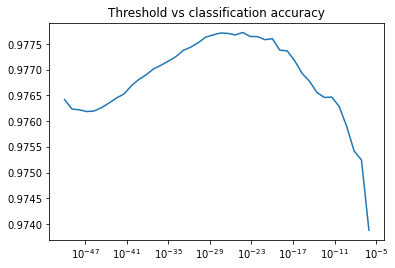

In [103]:
plt.figure()
plt.title('Threshold vs classification accuracy')
plt.semilogx(improve_thres[0:42],improve_accuracy[0:42])
plt.show()

Visualise results

In [104]:
improve_pdm = rescale_intensity(img_as_float(np.reshape(improve_results,(m,n))))

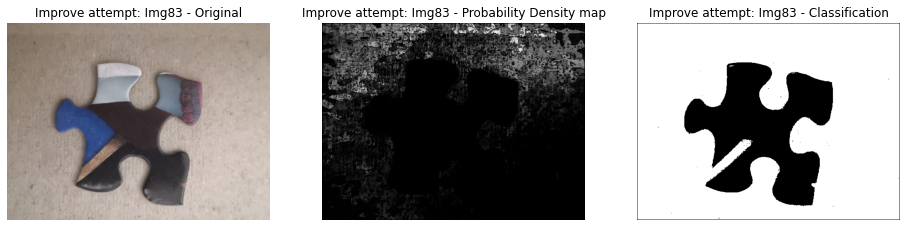

In [105]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_83), plt.title('Improve attempt: Img83 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(improve_pdm,cmap='gray'), plt.title('Improve attempt: Img83 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(improve_results>improve_thres_opti,(m,n))),cmap='gray'), plt.title('Improve attempt: Img83 - Classification') , plt.axis('off')
plt.show()

In the results it seems that the background classification has improved for the validation image as it is less noisey

test

In [106]:
improve_test_results = improve_model.pdf(test_data)

In [107]:
improve_test_thres = improve_thres_opti
improve_test_predict_bg = improve_test_results > improve_test_thres
improve_test_num_incorrect = np.sum(improve_test_predict_bg ^ np.ravel(~mask_110_b[:,:,0]))
improve_test_accuracy = 1-improve_test_num_incorrect/(np.size(improve_test_results))

In [108]:
print('The best accuracy was: ' + str(improve_test_accuracy))

The best accuracy was: 0.9423333333333334


In this case the final result in the test is that the improvement investigated did not work as well as expected for the test image

In [109]:
improve_test_pdm = rescale_intensity(img_as_float(np.reshape(improve_test_results,(m,n))))

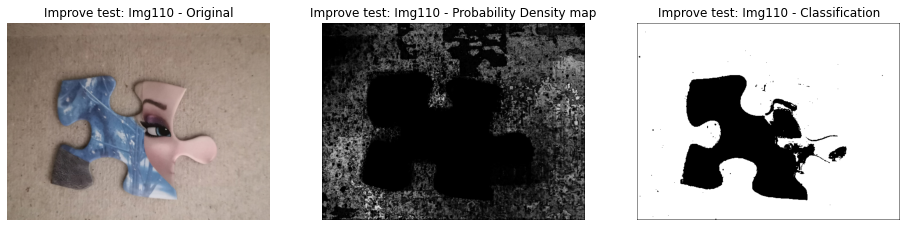

In [110]:
plt.subplots(1,3,figsize=(16,4),sharey=True)
plt.subplot(1,3,1), plt.imshow(img_110), plt.title('Improve test: Img110 - Original') , plt.axis('off')
plt.subplot(1,3,2), plt.imshow(improve_test_pdm,cmap='gray'), plt.title('Improve test: Img110 - Probability Density map') , plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_as_ubyte(np.reshape(improve_test_results>improve_test_thres,(m,n))),cmap='gray'), plt.title('Improve test: Img110 - Classification') , plt.axis('off')
plt.show()

Although the validation results were improved - The test results do not show an improvement and it can be seen that the results do not generalise well to the test iamge. More training examples should be evaulated to be sure if this approach is an improvement or not.

#### Q7 Performance

a. Unclear if own implementation is desired or not, so I am doing both

In [111]:
true_pos_1  = np.sum(test_predict_bg & np.ravel(~mask_110_b[:,:,0]))
false_pos_1 = np.sum(test_predict_bg & np.ravel(mask_110_b[:,:,0]))
true_neg_1  = np.sum(~test_predict_bg & np.ravel(mask_110_b[:,:,0]))
false_neg_1 = np.sum(~test_predict_bg & np.ravel(~mask_110_b[:,:,0]))

In [112]:
cf_matrix = np.array([[true_neg_1,false_pos_1],
                      [false_neg_1,true_pos_1]])

In [113]:
confusion_matrix(np.ravel(~mask_110_b[:,:,0]),test_predict_bg)

array([[ 59285,   1581],
       [  7358, 201776]], dtype=int64)

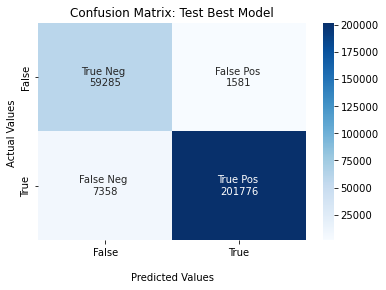

In [114]:
labels = ['True Neg \n' + str(true_neg_1),'False Pos \n' + str(false_pos_1),'False Neg \n' + str(false_neg_1),'True Pos \n' + str(true_pos_1)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix: Test Best Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The ideal plot is dark on the upper left and bottom right corners - Which show that a large proportion of pixels are correctly classified

In [115]:
true_pos_2  = np.sum(improve_test_predict_bg & np.ravel(~mask_110_b[:,:,0]))
false_pos_2 = np.sum(improve_test_predict_bg & np.ravel(mask_110_b[:,:,0]))
true_neg_2  = np.sum(~improve_test_predict_bg & np.ravel(mask_110_b[:,:,0]))
false_neg_2 = np.sum(~improve_test_predict_bg & np.ravel(~mask_110_b[:,:,0]))

In [116]:
cf_matrix = np.array([[true_neg_2,false_pos_2],
                      [false_neg_2,true_pos_2]])

In [117]:
confusion_matrix(np.ravel(~mask_110_b[:,:,0]),improve_test_predict_bg)

array([[ 48945,  11921],
       [  3649, 205485]], dtype=int64)

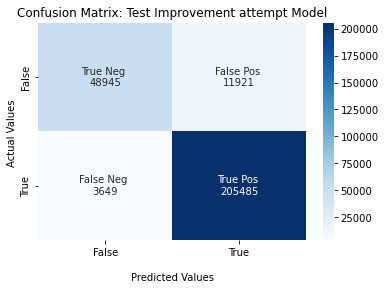

In [118]:
labels = ['True Neg \n' + str(true_neg_2),'False Pos \n' + str(false_pos_2),'False Neg \n' + str(false_neg_2),'True Pos \n' + str(true_pos_2)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix: Test Improvement attempt Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

It is seen that the attempted improved classifier identifys more bankground pixels correctly, however, classifys more pixels incorrectly than the "best" background classifier. This corresponds with the higher accuracy score acheived for the "best" classifier

b.

Using built in

In [119]:
print('Cohen\'s Kappa = ' + str(cohen_kappa_score(test_predict_bg,improve_test_predict_bg)))

Cohen's Kappa = 0.8306385353449348


Computing based on confusion matrices

In [120]:
pos_pos  = np.sum(test_predict_bg & improve_test_predict_bg)
pos_neg = np.sum(test_predict_bg & ~improve_test_predict_bg)
neg_pos  = np.sum(~test_predict_bg & improve_test_predict_bg)
neg_neg = np.sum(~test_predict_bg & ~improve_test_predict_bg)

In [121]:
total = (pos_pos+pos_neg+neg_pos+neg_neg)
Po = (pos_pos+neg_neg)/total
P_pos = ((pos_pos+pos_neg)/total)*((pos_pos+neg_pos)/total)
P_neg = ((neg_neg+pos_neg)/total)*((neg_neg+neg_pos)/total)
Pe = P_pos+P_neg

In [122]:
print('Cohen\'s Kappa = ' + str((Po-Pe)/(1-Pe)))

Cohen's Kappa = 0.8306385353449347


The score for Cohen's Kappa indicates that the two classifiers are highly in agreement with their decision making. This makes sence because the same high level technique is used to create each classifier

c. Assuming that only the best mask is desired

In [123]:
area_overlap = (~test_predict_bg) & np.ravel(mask_110_b[:,:,0])
area_union   = (~test_predict_bg) | np.ravel(mask_110_b[:,:,0])
IoU = np.sum(area_overlap)/np.sum(area_union)

In [124]:
print("The intersection-over-union is: " + str(IoU))

The intersection-over-union is: 0.8689757270168855


The intersection-over-union score quantifies to what extent the predicted mask overlaps with the ground truth mask. 1 is a perfect score, therefore the result shows a good outcome

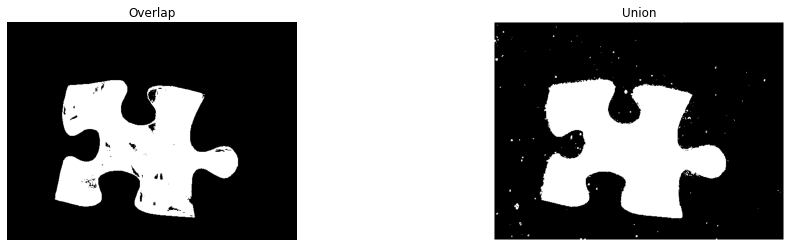

In [125]:
plt.subplots(1,2,figsize=(16,4),sharey=True)
plt.subplot(1,2,1), plt.imshow(img_as_ubyte(np.reshape(area_overlap,(m,n))),cmap='gray'), plt.title('Overlap') , plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_as_ubyte(np.reshape(area_union,(m,n))),cmap='gray'), plt.title('Union') , plt.axis('off')
plt.show()

d.

In [126]:
roc_thres = np.geomspace(1e-200,np.max(alt_results),num = 500)
true_pos = []
false_pos = []
precision = []
recall = []

for roc_thres_i in roc_thres:
    roc_predict_bg = alt_results > roc_thres_i
    true_pos.append(np.sum(roc_predict_bg & np.ravel(~mask_83_b[:,:,0]))/np.sum(np.ravel(~mask_83_b[:,:,0])))
    false_pos.append(np.sum(roc_predict_bg & np.ravel(mask_83_b[:,:,0]))/np.sum(np.ravel(mask_83_b[:,:,0])))
    precision.append(np.sum(roc_predict_bg & np.ravel(~mask_83_b[:,:,0]))/np.sum(roc_predict_bg))
    recall.append(np.sum(roc_predict_bg & np.ravel(~mask_83_b[:,:,0]))/np.sum(np.ravel(~mask_83_b[:,:,0])))

C:\Users\marce\AppData\Local\Temp/ipykernel_5876/1206702833.py:11: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(np.sum(roc_predict_bg & np.ravel(~mask_83_b[:,:,0]))/np.sum(roc_predict_bg))


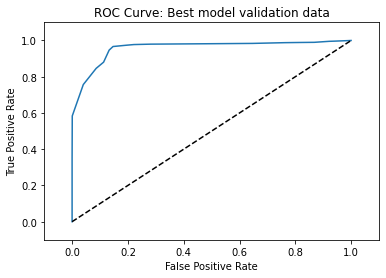

In [127]:
plt.figure()
plt.title('ROC Curve: Best model validation data')
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlim(-0.1,1.1)
plt.xlabel('False Positive Rate')
plt.plot(false_pos,true_pos)
plt.plot(np.linspace(0,1,2),np.linspace(0,1,2),color='k', linestyle='dashed')
plt.show()

The dashed line represents a random classifier as a baseline. At a threshold of 0.5 the true positive and false positive are 0.5 respectively (a coin toss). The classifier model approaches a right angle shape which means it is an effective classifier and significantly better than a random classifier. The plot shows how the threshold is used to tradeoff between correcly classifying all positive instances vs falsely classifying negative instances as positive. Knowing an acceptable limit for false positives, it is possible to choose the threshold that maxiises the amount of true positive classifications.

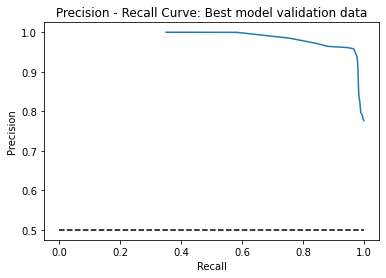

In [128]:
plt.figure()
plt.title('Precision - Recall Curve: Best model validation data')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(recall,precision)
plt.plot(np.linspace(0,1,2),np.linspace(0.5,0.5,2),color='k', linestyle='dashed')
plt.show()

Precision represents the ratio at which true positive classifications are made compared to all positive classifications made. Recall represents the ratio at which true positive classifications are made compared to all positive instances existing in the popultation. The plot shows the tradeoff of precision and recall via threshold - at the extreme case of very high precision at a conservative threshold, very few positive classifications are made which means that a large proportion of the positive population are missed. 

It is possible to use the above curves to optimise the threshold such that the largest precision and recall is acheived. An F score may be a better way to combine the two scores into a single quantity